# Integrated Project 1. The Gaming Report

By Valeriya Vazhnova

## Introduction

In this report we are going to get a review of the global gaming industry. Using the dataset provided by the online store **Ice**, we will investigate the situation on the gaming market and figure out:

- which gaming platforms are the most popular and profitable;
- if professional reviews affect sales on leading platforms and how;
- which game genres are the most popular;
- regional specifics of each of the main areas of distribution (North America, Europe and Japan).

We are also going to test two hypotheses:

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

This knowledge will help us identify patterns and make predictions for the upcoming year.

## <a id='cont'>Table of Contents</a>

**Section 1.** [Assessing the Data](#sect1)

[*Conclusions to Section 1*](#sect1concl)

**Section 2.** [Preprocessing the Data](#sect2)

- [Converting to Lowercase](#sect2lower)

- [Checking for Duplicates](#sect2dupl)

- [Checking for Missing Values](#sect2missing)

- [Calculating Total Sales](#sect2total)

- [Splitting the Dataset](#sect2split)

[*Conclusions to Section 2*](#sect2concl)

**Section 3.** [Determining the Timeframe](#sect3)

[*Conclusions to Section 3*](#sect3concl)

**Section 4.** [Analyzing Games by Platform](#sect4)

- [Calculating Z-score](#sect4zscore)

- [Lifespans of Platforms: a Heatmap](#sect4life)

- [Boxplot for the Global Sales](#sect4box)

- [Correlation Between Sales and Reviews](#sect4corr)

[*Conclusions to Section 4*](#sect4concl)

**Section 5.** [Analyzing Games by Genre](#sect5)

[*Conclusions to Section 5*](#sect5concl)

**Section 6.** [Overview of the Markets](#sect6)

- [Top-5 Platforms](#sect6platform)

- [Top-5 Genres](#sect6genre)

- [Influence of the ESRB rating](#sect6esrb)

- [Region Profiles](#sect6profile)

[*Conclusions to Section 6*](#sect6concl)

**Section 7.** [Testing the Hypotheses](#sect7)

- [Hypothesis 1](#sect7hyp1)

- [Hypothesis 2](#sect7hyp2)

[*Conclusions to Section 7*](#sect7concl)

[**General Conclusions**](#genconcl)

## <a id='sect1'>Section 1. Assessing the Data</a>

We'll start by importing all the necessary libraries: **pandas** for working with dataframes, **numpy** for handling multy-dimensional arrays, **matplotlib**, **plotly.express** and **seaborn** for creating visual representation of the data and **scipy** for statistical calculations. Then we'll download the data and have a look at several samples of it.

In [2]:
# for working with data

import pandas as pd
import numpy as np

# for plotting graphs
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# for testing hypotheses
from scipy import stats as st

# connecting to the data 
from io import BytesIO
import requests

# ignoring warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [3]:
# loading the data

spreadsheet_id = '1zUJGD3fPB_rEmjoYkm6XIo1rygp-ceL6fLqCVVE3-CU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9169,NCAA Basketball Final Four 97,PS,1997.0,Sports,0.08,0.05,0.00,0.01,NaN,NaN,NaN
12983,Bass Rise,PS,1999.0,Sports,0.03,0.02,0.00,0.00,NaN,NaN,NaN
6216,Indiana Jones and the Staff of Kings,PS2,2009.0,Action,0.11,0.01,0.00,0.16,55.0,7.5,T
7744,J-League Jikkyou Winning Eleven 3,PS,1997.0,Sports,0.00,0.00,0.18,0.01,NaN,NaN,NaN
10874,Johnny Bravo in The Hukka-Mega-Mighty-Ultra-Ex...,DS,2009.0,Action,0.09,0.00,0.00,0.01,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### <a id='sect1concl'>Conclusions to Section 1</a>

In the very beginning we've noticed some problems with the data. It has missing values in the columns:

- Name;
- Year_of_Release;
- Genre;
- Critic_Score;
- User_Score;
- Rating.

Also, some of the data is definitely the wrong type: Year_of_release and Critic_Score should be transformed to integer, and User_Score should definitely contain numeric values instead of strings.

[Back to Contents](#cont)

## <a id='sect2'>Section 2. Preprocessing the Data</a>

In this section we are going to detect and correct any flaws this dataset has. We'll start by switching column names and text values in all the columns to lowercase, since it's easier to work with and it could potentially help us find duplicated rows.

### <a id='sect2lower'>Converting to Lowercase</a>

In [7]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
to_lowercase = ['name', 'platform', 'genre']
for name in to_lowercase:
    data[name] = data[name].str.lower()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


[Back to Contents](#cont)

### <a id='sect2dupl'>Checking for Duplicates</a>

In [9]:
data.duplicated().sum()

0

Seems like this dataset has no duplicates.

[Back to Contents](#cont)

### <a id='sect2missing'>Checking for Missing Values</a>

In [10]:
data.isnull().sum()/len(data) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

This gives us an overview of our missing data. In the columns name and genre it is less than 1%, so we can easily drop it or replace it with 'unknown'. In the year_of_release column it's bare 1.6%, so we could try to group data by platform and replace the missing entries with a median value.

However, in the columns critic_score, user_score and rating a significant portion of data is missing (51%, 40% and 40% respectively). These numbers are too big ro replace, expecially considering the nature of the values: scores and ratings vary from game to game and it's hard to deduce them based on platform, year of release or genre.

In order to avoid inaccurate results, we suggest creating two separate datasets:

- the full one we will use when calculating total sales and discovering popular platfoms;
- the filtered one we will use for all the questions related to rating.

In [11]:
# having a look at missing names

data.loc[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
# replacing missing values in year_of_release with median year for any particular platform

data['year_of_release'] = data['year_of_release'].fillna(data.groupby('platform')['year_of_release'].transform('median'))
data.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [13]:
# dropping missing values

data = data.dropna(subset=['name', 'genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [14]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000
mean,2006.474960,0.263302,0.145045,0.077625,0.047343,68.967679
std,5.896089,0.813565,0.503359,0.308871,0.186742,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Some of the columns have 0s, but that's not a sign of a corrupt data. It means, that not all the games were sold on all the markets (e.g. some games were sold in North America, but not in Japan etc.), so we are going to keep them.

In [15]:
data.describe(include=['object'])

,name,platform,genre,user_score,rating
count,16713,16713,16713,10014,9949
unique,11559,31,12,96,8
top,need for speed: most wanted,ps2,action,tbd,E
freq,12,2161,3369,2424,3990


Here we see the problem. The column user_score (which should have had only numbers) contains strings 'tbd' (to be determined). What are these entries? These could be freshly released games, which haven't been assigned user rating yet.

In [16]:
tbd = data.query('user_score == "tbd"')
tbd['year_of_release'].describe()

count    2424.000000
mean     2007.443069
std         3.474103
min      1997.000000
25%      2005.000000
50%      2008.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

In [17]:
print('TBD score adds up to {:.1%} of all data'.format(len(tbd) / len(data)))

TBD score adds up to 14.5% of all data


However, this is not the case. Some of the games with 'tbd' user rating have been released in 1997, and majority of them — before 2008. It seems, the 'tbd' is another sign of a corrupt data and we have to deal with it as if it was a missing value.

While this is a big percentage, we don't have any good way to replace this data. And if we leave it as is, unfortunately, it will mess with our data on the stage of checking the hypotheses, so eventually we will have to filter it out.

In [18]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['critic_score'] = data['critic_score'].astype(int, errors='ignore')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


[Back to Contents](#cont)

### <a id='sect2total'>Calculating Total Sales</a>

In [19]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


[Back to Contents](#cont)

### <a id='sect2split'>Splitting the Dataset</a>

In [20]:
revenue = data.drop(columns={'critic_score', 'user_score', 'rating'})
revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   total_sales      16713 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [21]:
ratings = data[data.notnull().all(axis=1)]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6947 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6947 non-null   object 
 1   platform         6947 non-null   object 
 2   year_of_release  6947 non-null   int64  
 3   genre            6947 non-null   object 
 4   na_sales         6947 non-null   float64
 5   eu_sales         6947 non-null   float64
 6   jp_sales         6947 non-null   float64
 7   other_sales      6947 non-null   float64
 8   critic_score     6947 non-null   float64
 9   user_score       6947 non-null   float64
 10  rating           6947 non-null   object 
 11  total_sales      6947 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 705.6+ KB


[Back to Contents](#cont)

### <a id='sect2concl'>Conclusions to Section 2</a>
In this section we have tried to identify and fix weak points of the dataset. While dealing with missing values in name, genre and year_of_release columns was not too tricky, we noticed that the columns critic_score, user_score and rating have a significant portion of data missing (up to 50%). This looks like a big, systematic mistake: perhaps, while gathering data from different sources, some parts of the dataset went missing.

Due to the scale of the missing data and its nature (user and critic reviews, which can vary significantly from game to game), the best way is to filter out the corrupted data and use in out prognoses only the parts of the dataset we can rely on. 

Also we calculated total sales for all of the games.

Since the data was corrupted significantly, we decided to create two separate datasets: one for inspecting all the revenue-related issues and one with the clean critic and user scores and ESRB rating.

[Back to Contents](#cont)

## <a id='sect3'>Section 3. Determining the Timeframe</a>

In this section we will group the data by year and try to determine the timeframe which is significant for our research with the help of lollipop chart.

In [22]:
year = revenue[['year_of_release', 'name']].groupby('year_of_release').count().sort_values(by='year_of_release').reset_index()
year.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14


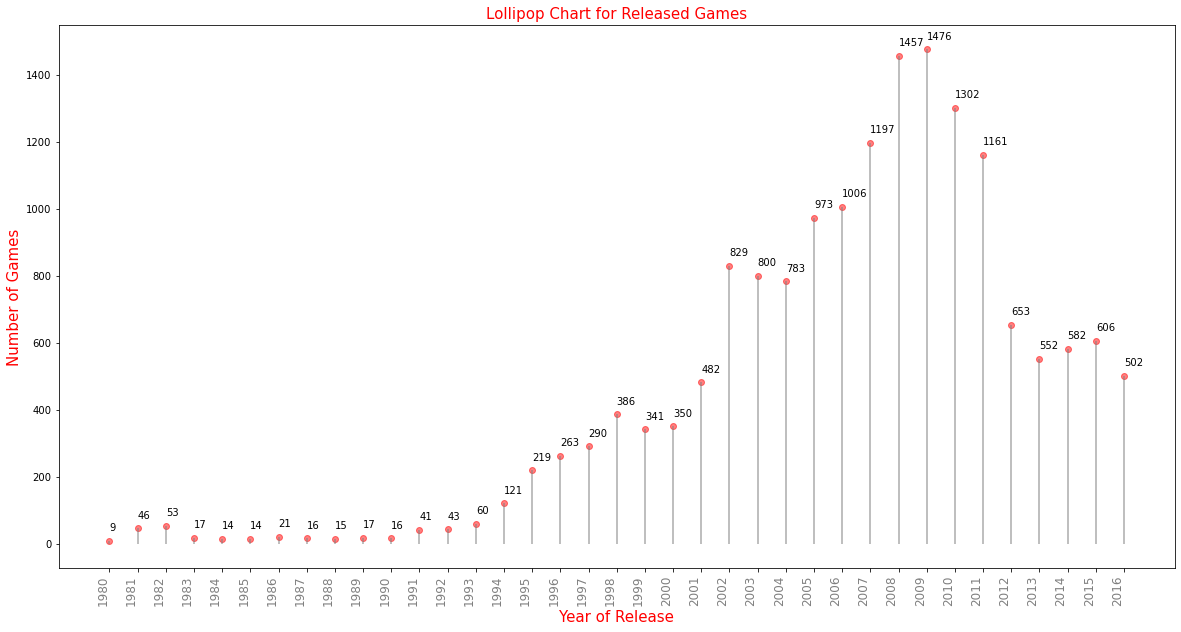

In [23]:
fig,ax = plt.subplots(figsize=(20,10));
ax.vlines(x=year['year_of_release'], ymin=0, ymax=year['name'], color='grey', alpha=0.5, linewidth=2)
ax.scatter(x=year['year_of_release'], y=year['name'], color='red', alpha=0.5)

ax.set_title('Lollipop Chart for Released Games', fontdict={'size':15, 'color':'red'})
ax.set_xlabel('Year of Release', fontdict={'size':15,'color':'red'})
ax.set_ylabel('Number of Games', fontdict={'size':15,'color':'red'})
ax.set_xticks(year['year_of_release'])
ax.set_xticklabels(year['year_of_release'], rotation=90, fontdict={'horizontalalignment':'right', 'size':12,'color':'grey'})

for y in year.itertuples():
    ax.text(y.year_of_release, y.name+30, s=round(y.name, 2))

As we see, our data covers the period from 1980 to 2016. However, during the first decades the number of sales was insignificant. So we are goind to subset our dataframe and use only data for 2001–2006, which is the most reliable and full.

In [24]:
revenue = revenue.query('year_of_release > 2000')
revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14361 entries, 0 to 16714
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14361 non-null  object 
 1   platform         14361 non-null  object 
 2   year_of_release  14361 non-null  int64  
 3   genre            14361 non-null  object 
 4   na_sales         14361 non-null  float64
 5   eu_sales         14361 non-null  float64
 6   jp_sales         14361 non-null  float64
 7   other_sales      14361 non-null  float64
 8   total_sales      14361 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.1+ MB


In [25]:
ratings = ratings.query('year_of_release > 2000')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6763 non-null   object 
 1   platform         6763 non-null   object 
 2   year_of_release  6763 non-null   int64  
 3   genre            6763 non-null   object 
 4   na_sales         6763 non-null   float64
 5   eu_sales         6763 non-null   float64
 6   jp_sales         6763 non-null   float64
 7   other_sales      6763 non-null   float64
 8   critic_score     6763 non-null   float64
 9   user_score       6763 non-null   float64
 10  rating           6763 non-null   object 
 11  total_sales      6763 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 686.9+ KB


### <a id='sect3concl'>Conclusions to Section 3</a>
In this Section, we used a lollipop chart to determine the timeframe with the fullest and the most significant data for our puproses, according to the number of sales. We decided to keep working with the data for the period between 2001 and 2016.

[Back to Contents](#cont)

## <a id='sect4'>Section 4. Analyzing Games by Platform</a>
In this section, we are going to assess various gaming platforms and determine the most profitable ones.

The **standard score** (z-score) will show us if the platform's revenue is growing or shrinking. Diverging bar plot and heatmap visualisations will help us determine most popular and reliable platforms.

### <a id='sect4zscore'>Calculating Z-score</a>

As we know, Z-score is the difference between the raw score (total sales of a particular platform) and the mean score (average sales for all the platforms) divided by the standard deviation.

In [27]:
platforms = revenue[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
platforms.head()

,platform,total_sales
0,ws,0.28
1,dc,1.42
2,n64,3.33
3,gb,9.24
4,ps,44.33


In [28]:
platforms['z_score'] = (platforms['total_sales']-platforms['total_sales'].mean()) / platforms['total_sales'].std()
platforms.head()

,platform,total_sales,z_score
0,ws,0.28,-0.909993
1,dc,1.42,-0.907044
2,n64,3.33,-0.902103
3,gb,9.24,-0.886814
4,ps,44.33,-0.796039


In [29]:
platforms['color'] = ['grey' if x<0 else 'red' for x in platforms['z_score']]
platforms.sample(10)

,platform,total_sales,z_score,color
9,pc,204.82,-0.380864,grey
3,gb,9.24,-0.886814,grey
16,wii,907.51,1.436942,red
10,xb,256.75,-0.246525,grey
5,psv,54.07,-0.770843,grey
6,wiiu,82.19,-0.698098,grey
4,ps,44.33,-0.796039,grey
8,gc,198.93,-0.396101,grey
7,xone,159.32,-0.498569,grey
19,ps2,1216.60,2.236534,red


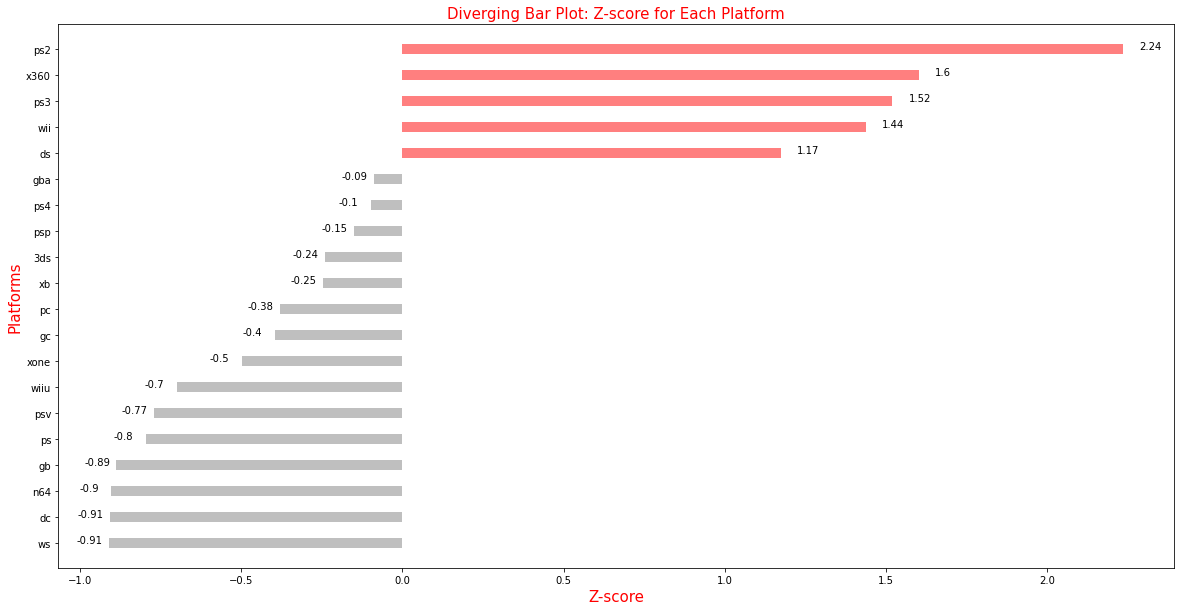

In [30]:
fig,ax = plt.subplots(figsize=(20,10))
ax.hlines(y=platforms.platform, xmin=0, xmax=platforms.z_score, color=platforms.color, alpha=0.5, linewidth=10)

ax.set_title('Diverging Bar Plot: Z-score for Each Platform', fontdict={'size':15, 'color':'red'})
ax.set_xlabel('Z-score', fontdict={'size':15,'color':'red'})
ax.set_ylabel('Platforms', fontdict={'size':15,'color':'red'})

for s in platforms.itertuples():
    if s.z_score < 0:
        ax.text(s.z_score-0.1, s.platform, s=round(s.z_score, 2))
    else:
        ax.text(s.z_score+0.05, s.platform, s=round(s.z_score, 2))

These are the platforms with positive Z-score:

- PS2
- X360
- PS3
- WII
- DS

It means, their revenue is above average, so they are the clear leaders of the market. 

[Back to Contents](#cont)

### <a id='sect4life'>Lifespans of Platforms: a Heatmap</a>

Now we are going to focus on changes in platforms over time. With the help of a heatmap we will find gaming platforms which used to be popular, but now have zero sales.

In [31]:
platforms_pivot = revenue.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)
platforms_pivot.head()

platform,3ds,dc,ds,gb,gba,gc,n64,pc,ps,ps2,ps3,ps4,psp,psv,wii,wiiu,ws,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,,,,
2001,0.0,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.0,0.0,0.00,0.0,0.0,0.0,0.28,0.00,22.26,0.0
2002,0.0,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,48.01,0.0
2003,0.0,0.00,0.00,0.00,61.64,52.81,0.00,8.84,2.07,184.31,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,55.04,0.0
2004,0.0,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.0,0.0,7.06,0.0,0.0,0.0,0.00,0.00,71.59,0.0
2005,0.0,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,182.87,0.0,0.0,43.84,0.0,0.0,0.0,0.00,8.25,49.08,0.0


In [32]:
lifespan = platforms_pivot - platforms_pivot.shift(+1)
lifespan.head()

platform,3ds,dc,ds,gb,gba,gc,n64,pc,ps,ps2,ps3,ps4,psp,psv,wii,wiiu,ws,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,0.0,-0.78,0.00,-9.24,12.63,25.47,-3.17,3.10,-28.92,38.95,0.0,0.0,0.00,0.0,0.0,0.0,-0.28,0.00,25.75,0.0
2003,0.0,-0.29,0.00,0.00,-12.52,1.00,-0.08,0.27,-4.60,-21.07,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,7.03,0.0
2004,0.0,0.00,17.27,0.00,16.27,-23.99,0.00,1.55,-2.07,27.50,0.0,0.0,7.06,0.0,0.0,0.0,0.00,0.00,16.55,0.0
2005,0.0,0.00,112.87,0.00,-44.05,-1.20,0.00,-6.02,0.00,-28.94,0.0,0.0,36.78,0.0,0.0,0.0,0.00,8.25,-22.51,0.0


The platforms with positive change from year to year are growing, the others are shrinking. A visualisation will help us understand it more clearly.

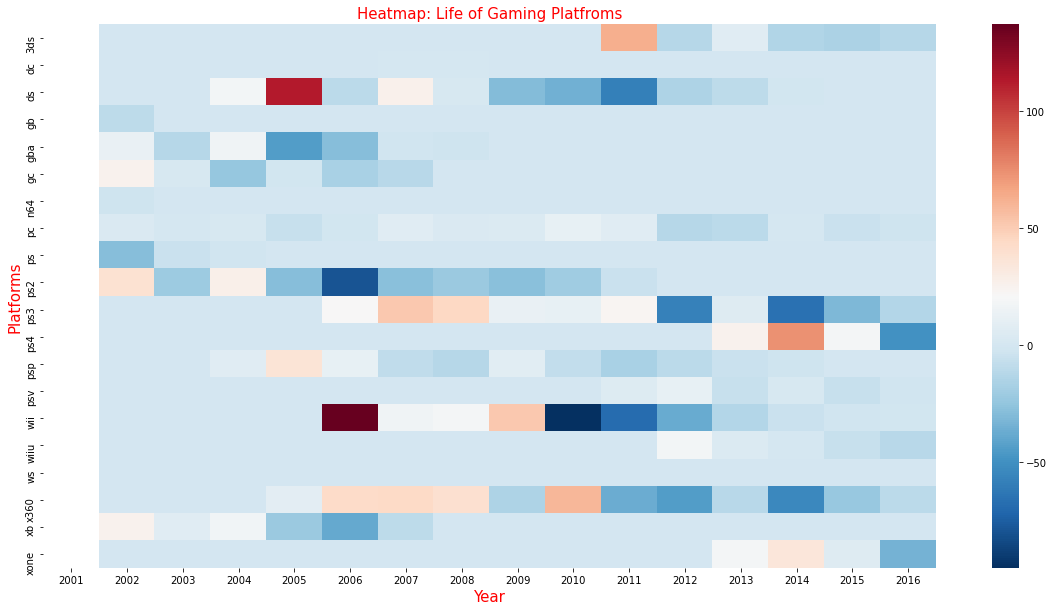

In [34]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(lifespan.T, cmap='RdBu_r')

ax.set_title('Heatmap: Life of Gaming Platfroms', fontdict={'size':15, 'color':'red'})
ax.set_xlabel('Year', fontdict={'size':15,'color':'red'})
ax.set_ylabel('Platforms', fontdict={'size':15,'color':'red'});

As we see, it takes around 3-4 years for new and extremely popular platforms to fade.

A good example is WII: it started with an explosive growth in 2006. However, this growth stopped in four years' time, by 2010. Since than its size remains stable. However, we should keep in mind, that it is one of the highly profitable platforms (as we remember from the z-score divering bar plot). Zero growth means, it gained a more or less permanent share of this very competitive market.

[Back to Contents](#cont)

### <a id='sect4box'>Boxplot for the Global Sales</a>
Now we are going to build a box plot for the global sales of all games, broken down by platform. This will give us another way to compare average sales on various gaming platforms and show us if the differences in sales are significant.

In [35]:
games = revenue.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
games.head()

,platform,year_of_release,total_sales
0,3ds,2011,63.20
1,3ds,2012,51.36
2,3ds,2013,57.76
3,3ds,2014,43.76
4,3ds,2015,27.78


In [36]:
ordered = games.groupby('platform')['total_sales'].sum().sort_values().reset_index()['platform']
ordered.head()

0     ws
1     dc
2    n64
3     gb
4     ps
Name: platform, dtype: object

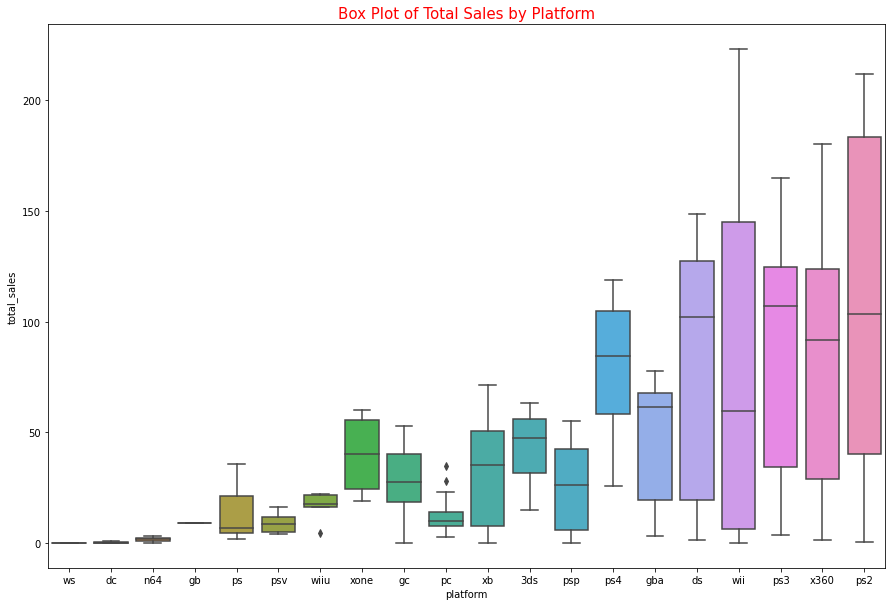

In [37]:
plt.figure(figsize=(15,10))
plt.title(label='Box Plot of Total Sales by Platform', fontdict={'size':15, 'color':'red'})
sns.boxplot(x='platform', y='total_sales', data=games, order=ordered);

On this box plot, we see data for the total sales of our platforms in the ascending order (from the least to the most profitable ones). We see, that difference in sales between the platforms is significant, and the market has a group of clear leaders.  

Up until 2016, the platforms with the biggest average sales were GBA, DS, WII, PS3, X360 and PS2. However, we should pay special attention to the PS4. As a new platform, which was released only in 2013, it managed to catch up with the leaders of the market very quickly. Its average sales are higher than the sales of many other platforms in their best years.

Therefore, it has a big potential.

[Back to Contents](#cont)

### <a id='sect4corr'>Correlation Between Sales and Reviews</a>

Now we are going to check if user and critic reviews affect sales on the popular platforms. For this experiment we will pick one of the most profitable platforms, PS2. 

Platform: PS2
Correlation with critic score: 0.39
Correlation with user score: 0.17



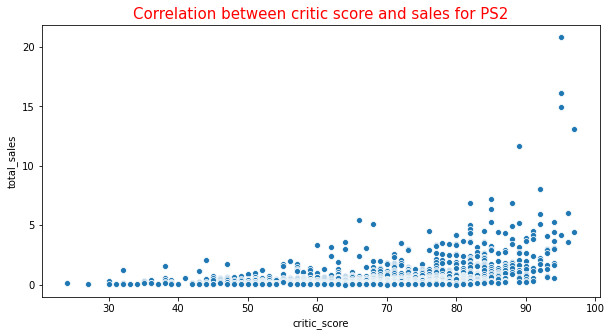

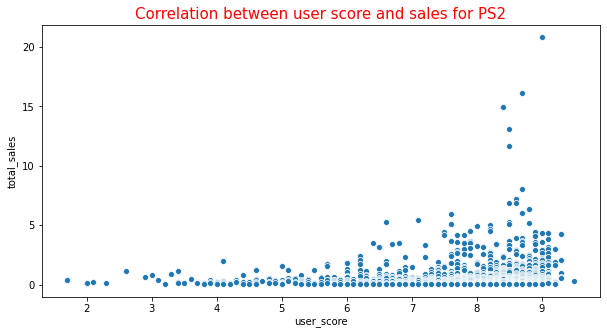

In [38]:
def review_correlation(name):
    print('Platform: {}'.format(str.upper(name)))
    platform = ratings.query('platform == @name')
    
    critic_corr = platform['total_sales'].corr(platform['critic_score'])
    print('Correlation with critic score: {:.2f}'.format(critic_corr))
    user_corr = platform['total_sales'].corr(platform['user_score'])
    print('Correlation with user score: {:.2f}'.format(user_corr))
    print('')
    
    fig,ax = plt.subplots(figsize=(10,5))
    ax.set_title('Correlation between critic score and sales for {}'.format(str.upper(name)), fontdict={'size':15, 'color':'red'})    
    sns.scatterplot(data=platform, x=platform['critic_score'], y=platform['total_sales'])

    fig,ax = plt.subplots(figsize=(10, 5))
    ax.set_title('Correlation between user score and sales for {}'.format(str.upper(name)), fontdict={'size':15, 'color':'red'})    
    sns.scatterplot(data=platform, x=platform['user_score'], y=platform['total_sales'])

review_correlation('ps2')

As we see, there is some positive correlation between critic score and total sales of the platform, but it is not that strong: the Pearson coefficient is only 0.39.

Similar positive correlation with user score also exists, but the Pierson coefficient is even weaker: only 0.17. To sum it up, user reviews have some influence on the revenue, but not a strong one. Expert reviews are more influential, but also to a certain extent.

Now let's see if these results are true for the other popular platforms.

Platform: X360
Correlation with critic score: 0.39
Correlation with user score: 0.11

Platform: PS3
Correlation with critic score: 0.43
Correlation with user score: 0.14

Platform: WII
Correlation with critic score: 0.17
Correlation with user score: 0.11

Platform: DS
Correlation with critic score: 0.23
Correlation with user score: 0.14

Platform: PS4
Correlation with critic score: 0.40
Correlation with user score: -0.03



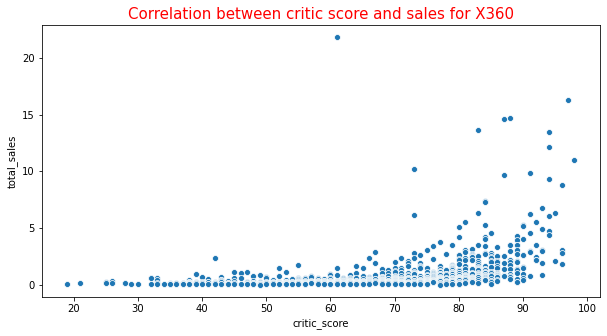

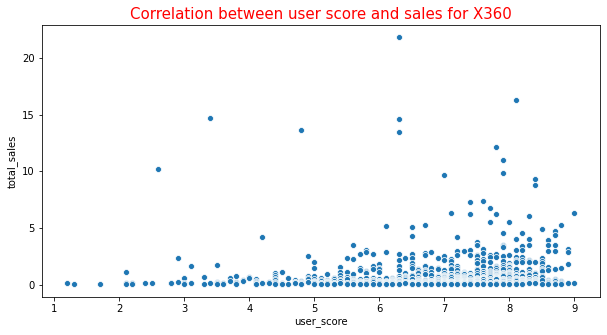

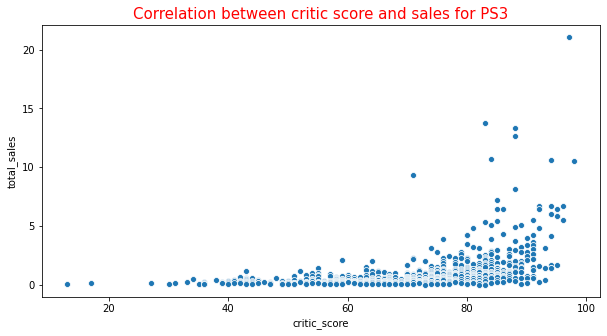

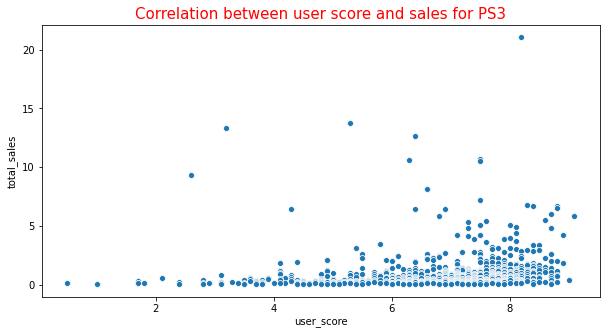

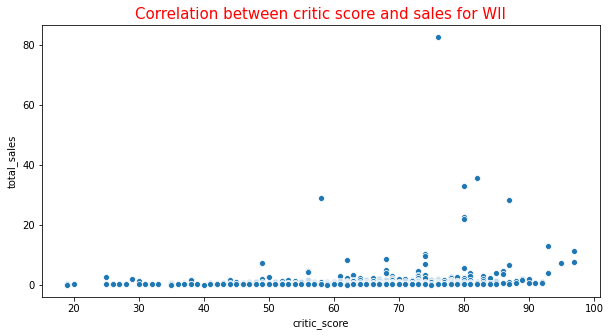

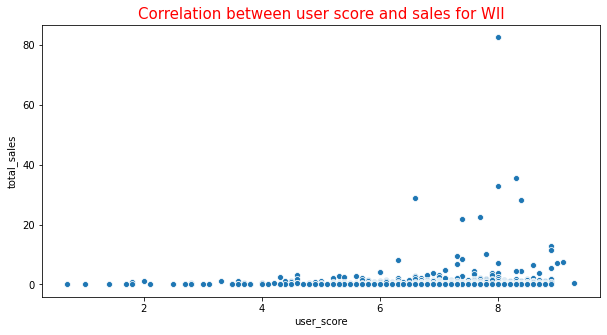

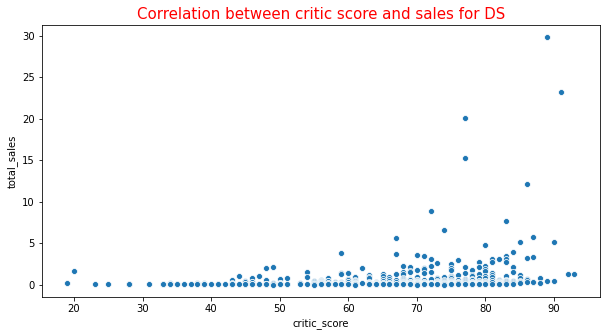

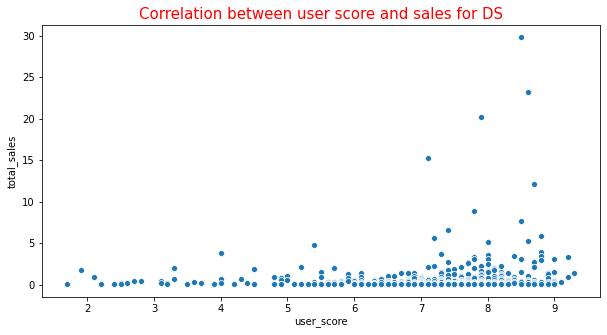

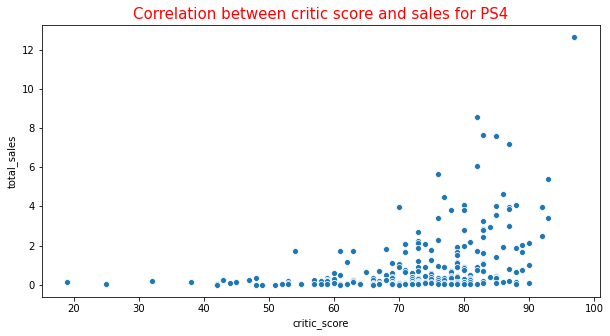

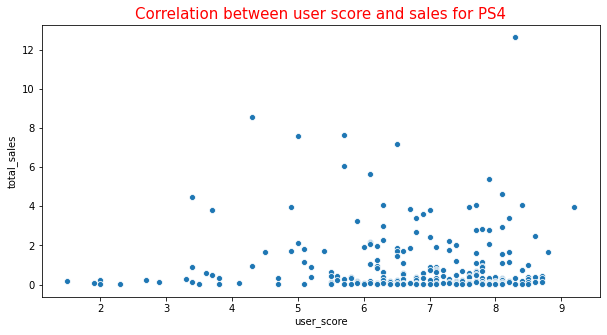

In [39]:
popular_platforms = ['x360', 'ps3', 'wii', 'ds', 'ps4']
for name in popular_platforms:
    review_correlation(name)

Almost everywhere we see the same picture. There is a medium positive correlation between expert reviews and total sales of the platform (the Pierson coefficient 0.39-0.43), and a much weaker positive correlation between user reviews and total sales (the Pierson coefficient 0.11-0.14, which is close to no correlation at all).

Several platforms, however, stand out. For PS4 there is almost no correlation between user reviews and revenue (the Pierson coefficient -0.03), which is probably because the platform is relatively new. While DS and WII (both released by Nintendo) have an extremely weak correlation with expert reviews (0.23 and 0.17).

[Back to Contents](#cont)

### <a id='sect4concl'>Conclusions to Section 4</a>
In this section we have analyzed the lifespan of the gaming platforms and their difference in sales.
We figured out, that by 2016 this market has several clear leaders with the highest total and average sales, including PS2, X360, PS3, WII and DS.

A newer platform, PS4 deserves special attention. It hasn't yet matched the leaders of the market in total sales, but its average sales are very high (well over 50 million USD), which means it has a great potential.

As we discovered for the most popular platforms, expert reviews do affect the sales, but the positive correlation is not that strong (the Pierson coefficient ≈0.40). Whereas user reviews have almost no influence on total sales.

[Back to Contents](#cont)

### <a id='sect5'>Section 5. Analyzing Games by Genre</a>

Here we are going to review the general distribution of games by genre and determine the most profitable genres.

In [40]:
genres_total = revenue.groupby('genre')[['total_sales']].sum().reset_index()
genres_total

,genre,total_sales
0,action,1515.43
1,adventure,183.54
2,fighting,296.04
3,misc,715.02
4,platform,479.56
5,puzzle,136.03
6,racing,545.35
7,role-playing,705.32
8,shooter,913.45
9,simulation,334.05


In [41]:
# creating order for the barplot

ordered_genres_tot = genres_total.sort_values(by='total_sales')['genre'].tolist()
ordered_genres_tot

['strategy',
 'puzzle',
 'adventure',
 'fighting',
 'simulation',
 'platform',
 'racing',
 'role-playing',
 'misc',
 'shooter',
 'sports',
 'action']

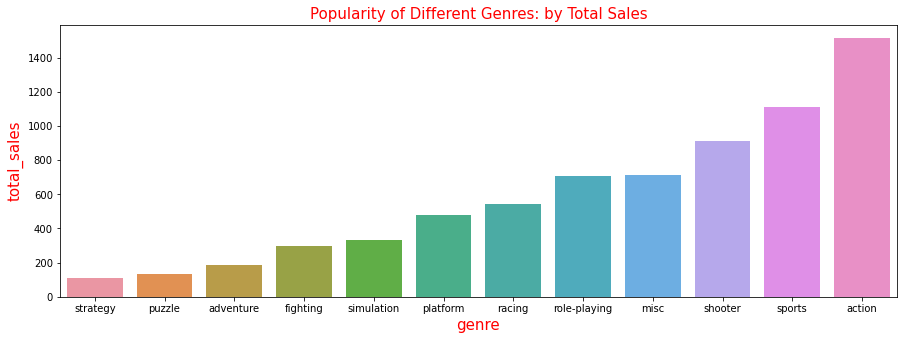

In [42]:
fig,ax = plt.subplots(figsize=(15,5))
ax.set_title('Popularity of Different Genres: by Total Sales', fontdict={'size':15, 'color':'red'})
ax.set_xlabel('Genre', fontdict={'size':15, 'color':'red'}) 
ax.set_ylabel('Total_sales', fontdict={'size':15, 'color':'red'})
sns.barplot(x=genres_total['genre'], y=genres_total['total_sales'], order=ordered_genres_tot)

In [43]:
revenue['genre'].value_counts()

action          3087
sports          1936
misc            1606
role-playing    1287
adventure       1185
shooter         1134
racing          1012
simulation       769
platform         705
fighting         622
strategy         543
puzzle           475
Name: genre, dtype: int64

These are all the genres compared by total sales. However, we know that it is not a fair method of comparison, since the difference between the number of games in two genres can reach up to 8 times (e.g. for action games and puzzles). So we are going to compare the average sales.

In [44]:
genres_avg = revenue.groupby('genre')[['total_sales']].mean().reset_index()
genres_avg.rename(columns={'total_sales':'average_sales'}, inplace=True)
genres_avg

,genre,average_sales
0,action,0.490907
1,adventure,0.154886
2,fighting,0.475949
3,misc,0.445218
4,platform,0.680227
5,puzzle,0.286379
6,racing,0.538883
7,role-playing,0.548034
8,shooter,0.805511
9,simulation,0.434395


In [45]:
# creating order for the barplot

ordered_genres_avg = genres_avg.sort_values(by='average_sales')['genre'].tolist()
ordered_genres_avg

['adventure',
 'strategy',
 'puzzle',
 'simulation',
 'misc',
 'fighting',
 'action',
 'racing',
 'role-playing',
 'sports',
 'platform',
 'shooter']

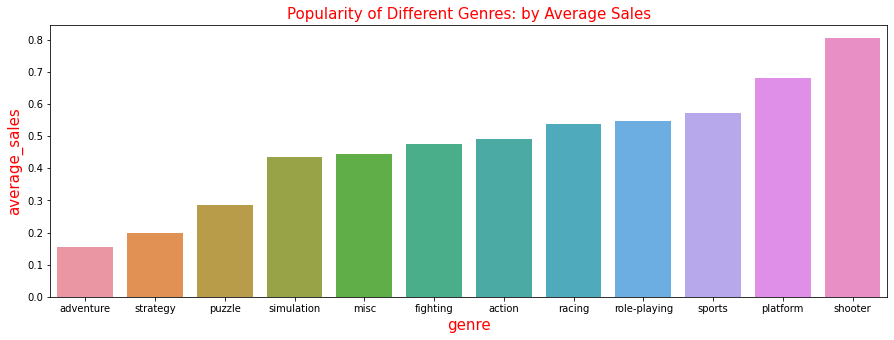

In [46]:
fig,ax = plt.subplots(figsize=(15,5))
ax.set_title('Popularity of Different Genres: by Average Sales', fontdict={'size':15, 'color':'red'})
ax.set_xlabel('Genre', fontdict={'size':15, 'color':'red'}) 
ax.set_ylabel('Total_sales', fontdict={'size':15, 'color':'red'})
sns.barplot(x=genres_avg['genre'], y=genres_avg['average_sales'], order=ordered_genres_avg)

Now we see a slightly different distribution. Compared by total sales, the most popular genres are action (1515.43 mln USD), sports (1108.95 mln USD) and shooter (913.45 mln USD).

However, compared by average sales, the most popular genres are shooter (0.8 mln USD), sports (0.7 mln USD) and platform games (0.6 mln USD).

### <a id='sect5concl'>Conclusions to Section 5</a>

Apparently, some genres are more popular and some are less. In general, the three genres with the highest average sales are shooter (0.8 mln USD), sports (0.7 mln USD) and platform games (0.6 mln USD).

We're not quite sure what is the key for such popularity of the shooters. But in addition to obvious reasons, such as search for adrenaline, competitiveness and the first-person point of view, they are described as games with a low entry barrier and a simple gameplay. These qualities must attract gamers form all over the world. As we will see in the next section, this genre is one of the top-5 on two biggest gaming markets: American and European.

[Back to Contents](#cont)

## <a id='sect6'>Section 6. Overview of the Markets</a>

Now we are going to inspect the three main regions (North America, Europe and Japan) and find out if there are regional differences in gaming industry or not.

For each of them we will determine:
- the top five platforms;
- the top five genres;
- influence of the ESRB rating.

### <a id='sect6platform'>Top-5 Platforms</a>

North America: top-5 platforms
   index platform  na_sales
0     17     x360    602.47
1      9      ps2    567.76
2     14      wii    496.90
3     10      ps3    393.49
4      2       ds    382.40


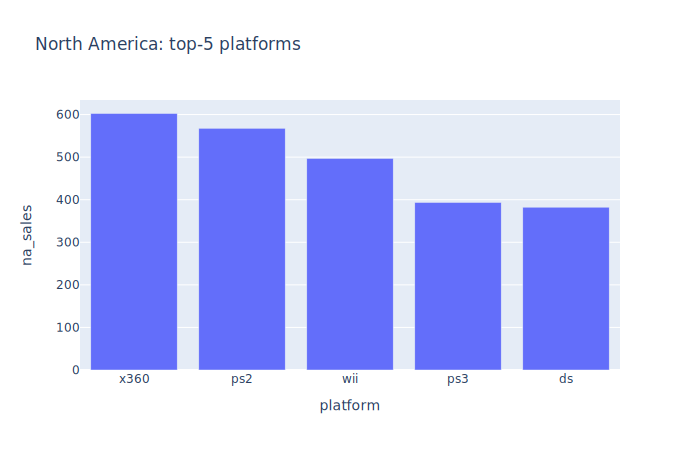


Europe: top-5 platforms
   index platform  eu_sales
0     10      ps3    330.29
1      9      ps2    328.65
2     17     x360    270.76
3     14      wii    262.21
4      2       ds    188.89


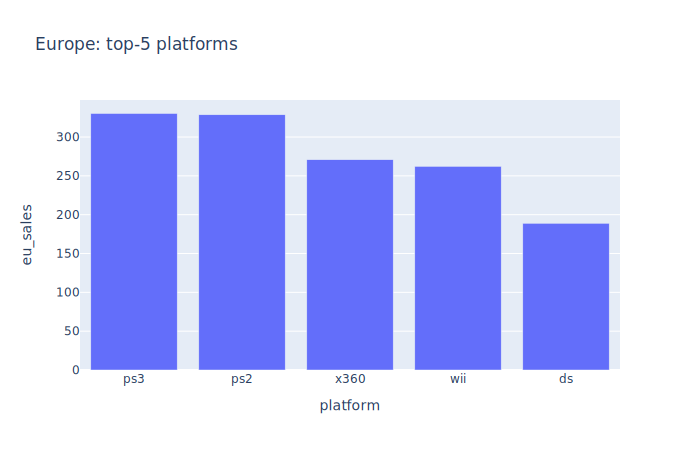


Japan: top-5 platforms
   index platform  jp_sales
0      2       ds    175.55
1      9      ps2    130.33
2      0      3ds    100.67
3     10      ps3     80.19
4     12      psp     76.78


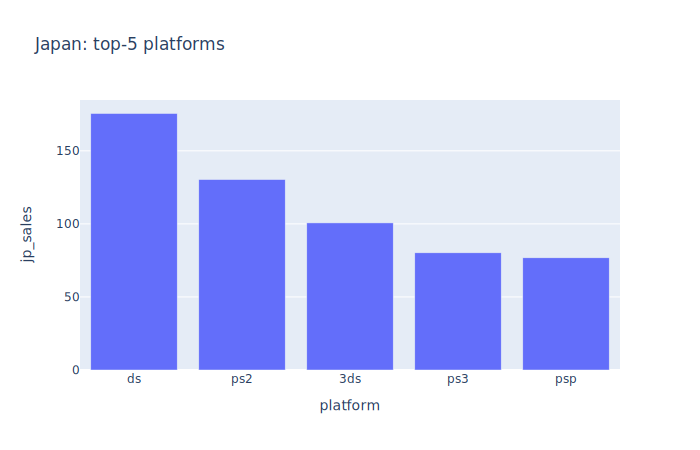


Total: top-5 platforms
   index platform  total_sales
0      9      ps2      1216.60
1     17     x360       971.42
2     10      ps3       939.65
3     14      wii       907.51
4      2       ds       806.10


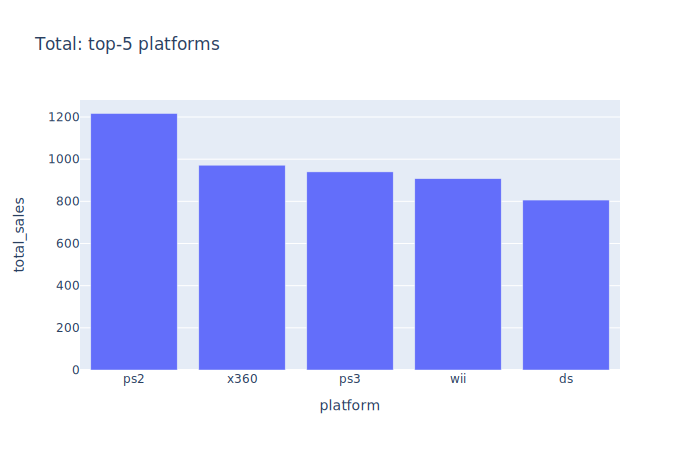

In [47]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'total_sales']

for name in regions:
    if name == 'na_sales':
        region = 'North America'
    elif name == 'eu_sales':
        region = 'Europe'
    elif name == 'jp_sales':
        region = 'Japan'
    else:
        region = 'Total'
        
    market = revenue.groupby('platform')[name].sum().reset_index()
    largest = market.nlargest(5, name).reset_index()
    
    print('{}: top-5 platforms'.format(region))
    print(largest)
    
    fig = px.bar(largest, x='platform', y=name, title='{}: top-5 platforms'.format(region))
    fig.show('svg')
    print('')

Unsurprisingly, list of top-5 platforms varies from one region to another: almost in every region it consists of the same five platforms in different order. We might say, it shows some signs of partiotism: in North America gaming platform number one is american Xbox 360 (developed by Microsoft), while in Japan the clear leader is Japanese DS (developed by Nintendo). In Europe, the most popular platform is PS3, followed by PS2 (by Sony).

On the last bar plot, we can compare these observations to the global gaming industry statistics, where the undisputable leader is PS2.

[Back to Contents](#cont)

### <a id='sect6genre'>Top-5 Genres</a>

North America: top-5 genres
   index         genre  na_sales
0      0        action    746.72
1     10        sports    578.44
2      8       shooter    495.37
3      3          misc    365.83
4      7  role-playing    275.87


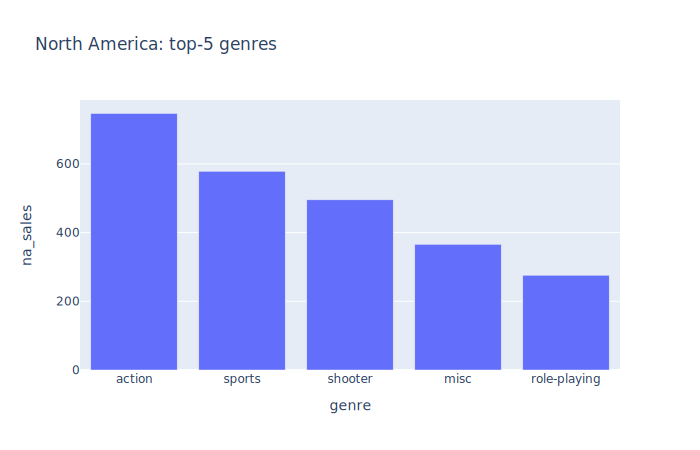


Europe: top-5 genres
   index    genre  eu_sales
0      0   action    463.18
1     10   sports    334.68
2      8  shooter    294.47
3      3     misc    193.94
4      6   racing    187.40


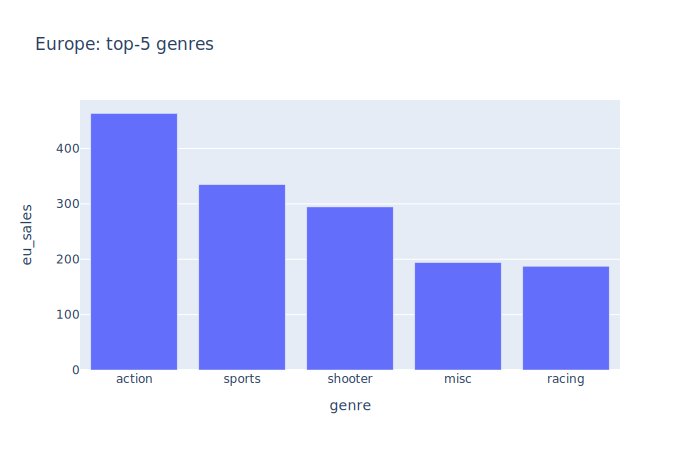


Japan: top-5 genres
   index         genre  jp_sales
0      7  role-playing    227.64
1      0        action    129.78
2      3          misc     83.75
3     10        sports     69.96
4      4      platform     52.83


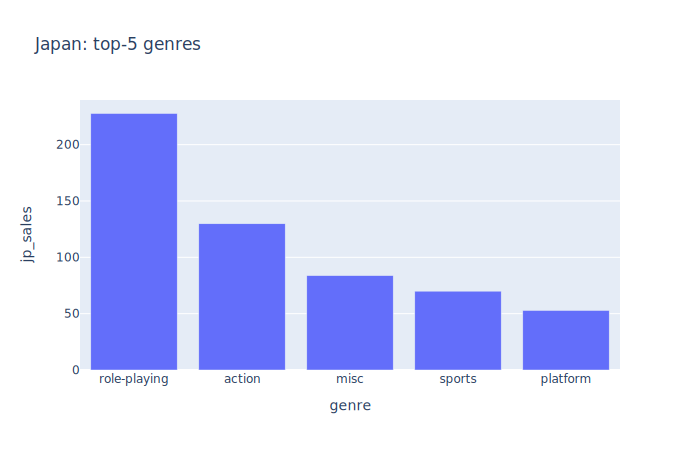


Total: top-5 genres
   index         genre  total_sales
0      0        action      1515.43
1     10        sports      1108.95
2      8       shooter       913.45
3      3          misc       715.02
4      7  role-playing       705.32


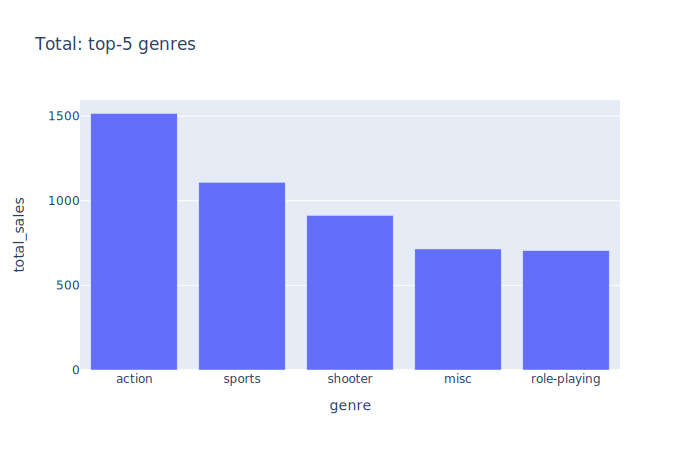

In [48]:
for name in regions:
    if name == 'na_sales':
        region = 'North America'
    elif name == 'eu_sales':
        region = 'Europe'
    elif name == 'jp_sales':
        region = 'Japan'
    else:
        region = 'Total'
        
    market = revenue.groupby('genre')[name].sum().reset_index()
    popular = market.nlargest(5, name).reset_index()
    
    print('{}: top-5 genres'.format(region))
    print(popular)
    
    fig = px.bar(popular, x='genre', y=name, title='{}: top-5 genres'.format(region))
    fig.show('svg')
    print('')

The top-5 genres also differ from market to market. In general, Americans and Europeans have the same preferences (action, sports and shooters). However, Americans also buy a lot of role-playing games, while Europeans prefer racing. Both times 'miscellaneous' turns out to be a rather popular category, however, we can't know for sure what it includes.

Japanese gaming market presents the biggest difference. Here the most popular genre is pole-playing, and also platform games made it in the top-5.

We're not entirely sure what causes such a difference. One way to explain it is to acknowledge the difference between Eastern and Western mentality and their cultural codes. Apparently, there is a whole subgenre of Japanese role-play games (JRPG), which differ significantly from Western RPGs in the visual style, narratives, characters' appearance and behavior and many other aspects. These games are tailored for Japanese market, which explains their home popularity. However, outside of Japan, their target audience is rather minimal.

More on the cultural differences in game reseption can be found <a href='https://www.researchgate.net/publication/328530272_Exploring_Cultural_Differences_in_Game_Reception_JRPGs_in_Germany_and_Japan'>in this research</a>.

Another possible explanation is the offer of such genres on the local market. For instance, platform games originated from Japan, the first ones being *Space Panic* (designed by Universal in 1980) and *Donkey King* (released by Nintendo in 1981). Also, the world-famous *Mario* franchise is Japanese. So it seems likely that this genre remained extremely popular on their home market.

Again, on the last bar plot, we can compare these results to the global statistics.

[Back to Contents](#cont)

### <a id='sect6esrb'>Influence of the ESRB Rating</a>

In [49]:
ratings['rating'].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

A quick reminder:
- **E** stands for 'Everyone';
- **E10+**: 'Everyone 10+';
- **T**: 'Teen' (13+);
- **M**: 'Mature' (17+);
- **AO**: 'Adults Only' (18+);
- **RP**: 'Rating Pending'.

In [50]:
ratings['rating'].value_counts().reset_index()

,index,rating
0,T,2332
1,E,2050
2,M,1433
3,E10+,945
4,RP,2
5,AO,1


In this dataset, we have almost no games for adults or with RP (perhaps they were among the NaN values, but we have no way to check it). All the other categories are well presented.

In [57]:
# uniting all information about sales of different ratings in different regions in one dataframe

#creating an empty dataframe
all_columns = ['rating', 'sales', 'region']
all_rating = pd.DataFrame(columns=all_columns)
all_rating

,rating,sales,region


In [58]:
for name in regions:
    if name == 'na_sales':
        region = 'North America'
    elif name == 'eu_sales':
        region = 'Europe'
    elif name == 'jp_sales':
        region = 'Japan'
    else:
        region = 'Total'
        
    rating_reg = ratings.groupby('rating')[name].sum().reset_index()
    rating_reg['region'] = np.NaN
    rating_reg.fillna(region, inplace=True)
    rating_reg.rename(columns={name:'sales'}, inplace=True)
    all_rating = all_rating.append(rating_reg)
    
all_rating

,rating,sales,region
0,AO,1.26,North America
1,E,965.79,North America
2,E10+,292.85,North America
3,M,713.29,North America
4,RP,0.00,North America
5,T,650.65,North America
0,AO,0.61,Europe
1,E,574.55,Europe
2,E10+,160.64,Europe
3,M,461.85,Europe


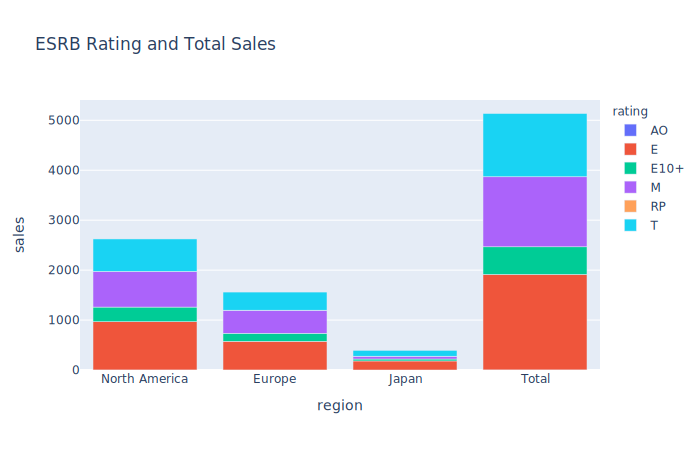

In [59]:
fig = px.bar(all_rating, x='region', y='sales', color='rating', title="ESRB Rating and Total Sales")
fig.show('svg')

Apparently, the games rated E, M and T have the biggest sales in North America, Europe and in the world in general (with E being the leader). In Japan, games with E rating have the biggest share of the market. Games rated E10+ are not popular on any of the markets.

[Back to Contents](#cont)

### <a id='sect6profile'>Region Profiles</a>

We already have all the necessary information to describe specifics of gaming industry in each region. Now we are just going to compile a nice table for keeping all this data together.  

In [60]:
regtotal_columns = ['platform', 'sales_pl', 'region', 'genre', 'sales_gen']
regiontotal = pd.DataFrame(columns=regtotal_columns)
regiontotal

,platform,sales_pl,region,genre,sales_gen


In [61]:
three_regions = ['na_sales', 'eu_sales', 'jp_sales']

for name in three_regions:
    if name == 'na_sales':
        regionname = 'North America'
    elif name == 'eu_sales':
        regionname = 'Europe'
    else:
        regionname = 'Japan'
        
    regionplatf = revenue.groupby('platform')[name].sum().sort_values(ascending=False).reset_index()
    regionplatf = regionplatf[:5]
    regionplatf['region'] = regionname
    regionplatf = regionplatf.rename(columns={name: 'sales_pl'})
    
    regiongenre = revenue.groupby('genre')[name].sum().sort_values(ascending=False).reset_index()
    regiongenre = regiongenre[:5]
    regiongenre = regiongenre.rename(columns={name: 'sales_gen'})
    
    regionplatf = regionplatf.join(regiongenre)
    
    regiontotal = regiontotal.append(regionplatf)

regiontotal

,platform,sales_pl,region,genre,sales_gen
0,x360,602.47,North America,action,746.72
1,ps2,567.76,North America,sports,578.44
2,wii,496.90,North America,shooter,495.37
3,ps3,393.49,North America,misc,365.83
4,ds,382.40,North America,role-playing,275.87
0,ps3,330.29,Europe,action,463.18
1,ps2,328.65,Europe,sports,334.68
2,x360,270.76,Europe,shooter,294.47
3,wii,262.21,Europe,misc,193.94
4,ds,188.89,Europe,racing,187.40


In [62]:
region_profile = regiontotal.pivot_table(index=['region', 'platform', 'genre'], values=['sales_pl', 'sales_gen'], aggfunc='sum')
region_profile.sort_values(by='sales_pl', ascending=False)

sales_gen  sales_pl
region        platform genre                            
North America x360     action           746.72    602.47
              ps2      sports           578.44    567.76
              wii      shooter          495.37    496.90
              ps3      misc             365.83    393.49
              ds       role-playing     275.87    382.40
Europe        ps3      action           463.18    330.29
              ps2      sports           334.68    328.65
              x360     shooter          294.47    270.76
              wii      misc             193.94    262.21
              ds       racing           187.40    188.89
Japan         ds       role-playing     227.64    175.55
              ps2      action           129.78    130.33
              3ds      misc              83.75    100.67
              ps3      sports            69.96     80.19
              psp      platform          52.83     76.78

[Back to Contents](#cont)

### <a id='sect6concl'>Conclusions to Section 6</a>

In this part of our research, we have studied three main markets of the global gaming industry: North America, Europe and Japan.

We've discovered that the top-5 plafrorms remain the same on all the markets: XBox 360 (made by Microsoft), PS2 and PS3 (by Sony), WII and DS (by Nintendo). However, each country has its own order (with local leaders in 2 out of 3 markets): in North America the most popular platform is American XBox 360 (602.47 mln USD in total sales), in Japan — Japanese DS (175.55 mln USD), in Europe — PS3 (330.29 mln USD). We've also noticed that in terms of total sales for these popular platforms, American market is almost twice bigger than European, and European is almost twice bigger than Japanese.

While Europeans and Americans prefer almost the same genres (action, sports and shooter), Japanese gamers somewhat differ from them. Their top-5 genres include role-playing (on the first place) and platform games.

As for the ESRB rating, it seems to work in the same way around the world: games labeled E (Everyone) have the biggest sales. They are followed by M (Mature) and T (Teens). Games rated E10+ are much less popular. In this dataset, we had only one game rated AO (Adults Only). We suspect, that information about other AO games has been lost in the process of collecting the data.

[Back to Contents](#cont)

## <a id='sect7'>Section 7. Testing the Hypotheses</a>

In this research, we have two hypotheses to test:

1. Average user ratings of the Xbox One and PC platforms are the same.
2. Average user ratings for the Action and Sports genres are different.

We are going to do that with the help of the Student t-test.

### <a id='sect7hyp1'>Hypothesis 1</a>

Our **null hypothesis** is: average user ratings of the Xbox One and PC platforms are the same.

If it is disproven, the **alternative hypothesis** will be the following: average user ratings of the XBox One and PC platforms differ from each other.

We are setting **critical significance level (alpha) to 5%**, since it's a very common value and this seems a satisfactory level of precision for our case.

We are going to create two subsets of data, one for each of the gaming platforms.

In [63]:
xbox = ratings.query('platform == "xone"')
xbox.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,call of duty: advanced warfare,xone,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,halo 5: guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,fallout 4,xone,2015,role-playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,assassin's creed: unity,xone,2014,action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [64]:
xbox.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 165 to 16630
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             159 non-null    object 
 1   platform         159 non-null    object 
 2   year_of_release  159 non-null    int64  
 3   genre            159 non-null    object 
 4   na_sales         159 non-null    float64
 5   eu_sales         159 non-null    float64
 6   jp_sales         159 non-null    float64
 7   other_sales      159 non-null    float64
 8   critic_score     159 non-null    float64
 9   user_score       159 non-null    float64
 10  rating           159 non-null    object 
 11  total_sales      159 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 16.1+ KB


In [65]:
pc = ratings.query('platform == "pc"')
pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,the sims 3,pc,2009,simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,8.01
138,world of warcraft,pc,2004,role-playing,0.08,6.21,0.0,0.00,93.0,7.3,T,6.29
192,diablo iii,pc,2012,role-playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
218,starcraft ii: wings of liberty,pc,2010,strategy,2.57,1.68,0.0,0.58,93.0,8.2,T,4.83
288,world of warcraft: the burning crusade,pc,2007,role-playing,2.57,1.52,0.0,0.00,91.0,7.9,T,4.09


In [66]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 85 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             652 non-null    object 
 1   platform         652 non-null    object 
 2   year_of_release  652 non-null    int64  
 3   genre            652 non-null    object 
 4   na_sales         652 non-null    float64
 5   eu_sales         652 non-null    float64
 6   jp_sales         652 non-null    float64
 7   other_sales      652 non-null    float64
 8   critic_score     652 non-null    float64
 9   user_score       652 non-null    float64
 10  rating           652 non-null    object 
 11  total_sales      652 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 66.2+ KB


These two datasets differ in size significantly. And there is a good reason for that.

In [67]:
xbox['year_of_release'].describe()

count     159.000000
mean     2014.899371
std         0.982086
min      2013.000000
25%      2014.000000
50%      2015.000000
75%      2016.000000
max      2016.000000
Name: year_of_release, dtype: float64

In [68]:
pc['year_of_release'].describe()

count     652.000000
mean     2009.374233
std         3.736047
min      2001.000000
25%      2007.000000
50%      2010.000000
75%      2012.000000
max      2016.000000
Name: year_of_release, dtype: float64

We see that the first XBox One games were released in 2001, while PC games date back to 2001, hence the difference in the subset size: we're comparing 15 years' worth of user scores to 3 years'. That is definitely not a fair comparison.

In oder to obtain more accurate results, we are going filter the PC games subset and use only  data for the corresponding period (2013–2016).

In [69]:
pc = pc.query('year_of_release > 2012')
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             133 non-null    object 
 1   platform         133 non-null    object 
 2   year_of_release  133 non-null    int64  
 3   genre            133 non-null    object 
 4   na_sales         133 non-null    float64
 5   eu_sales         133 non-null    float64
 6   jp_sales         133 non-null    float64
 7   other_sales      133 non-null    float64
 8   critic_score     133 non-null    float64
 9   user_score       133 non-null    float64
 10  rating           133 non-null    object 
 11  total_sales      133 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 13.5+ KB


When comparing two statistical populations in the Student's t-test, we need to set the equal variance parameter to True or False. To determine this parameter, we are going to use the **Levene's test**. The variances will be considered equal, if the p-value of the test is greater than significance level (**alpha**, which we'll set at a commonly used threshold of 5%).

In [70]:
alpha = 0.05

var_test = st.levene(xbox['user_score'], pc['user_score'], center='mean')
print('p-value:', var_test.pvalue)

if var_test.pvalue > alpha:
    print('We will consider the variances equal')
else:
    print('The variances are not equal')

p-value: 0.0002061698307940298
The variances are not equal


Now we are going to run the Student's t-test, setting the significance level to 5% (we'll use the variable aplha from the previous test).

In [71]:
results_platform = st.ttest_ind(xbox['user_score'], pc['user_score'], equal_var=False)
print('p-value:', results_platform.pvalue)

if results_platform.pvalue > alpha:
    print("We can't reject the null hypothesis")
else:
    print('The null hypothesis is rejected')

p-value: 0.14104275299383137
We can't reject the null hypothesis


We got the p-value 0.141 (14%), which is above our significance level (5%). It means, the probability of getting such a result in the world where our null hypothesis is true is high enough. That's why we can't reject the null hypothesis.

It gives us the right to assume that on average XBox One games and PC games have similar average user scores.

To back this up, we-ve calculated calculate average user score for XBox One and PC games and got these results:

In [72]:
xbox_avg = xbox['user_score'].mean()
pc_avg = pc['user_score'].mean()
print('Average score for Xbox One games: {:.2f}'.format(xbox_avg))
print('Average score for PC games: {:.2f}'.format(pc_avg))

Average score for Xbox One games: 6.49
Average score for PC games: 6.22


[Back to Contents](#cont)

### <a id='sect7hyp2'>Hypothesis 2</a>

We are going to check if average user ratings for the Action and Sports genres are different.

**Null hypothesis:** Average user ratings for these genres are the same.

**Alternative hypothesis:** average user ratings for these genres are different.

**Critical level of significance:** 5%

In [73]:
action = ratings.query('genre == "action"')
action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,grand theft auto: san andreas,ps2,2004,action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
24,grand theft auto: vice city,ps2,2002,action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
38,grand theft auto iii,ps2,2001,action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10


In [74]:
action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1635 non-null   object 
 1   platform         1635 non-null   object 
 2   year_of_release  1635 non-null   int64  
 3   genre            1635 non-null   object 
 4   na_sales         1635 non-null   float64
 5   eu_sales         1635 non-null   float64
 6   jp_sales         1635 non-null   float64
 7   other_sales      1635 non-null   float64
 8   critic_score     1635 non-null   float64
 9   user_score       1635 non-null   float64
 10  rating           1635 non-null   object 
 11  total_sales      1635 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 166.1+ KB


In [75]:
sports = ratings.query('genre == "sports"')
sports.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
13,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
15,wii fit plus,wii,2009,sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [76]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 16546
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             950 non-null    object 
 1   platform         950 non-null    object 
 2   year_of_release  950 non-null    int64  
 3   genre            950 non-null    object 
 4   na_sales         950 non-null    float64
 5   eu_sales         950 non-null    float64
 6   jp_sales         950 non-null    float64
 7   other_sales      950 non-null    float64
 8   critic_score     950 non-null    float64
 9   user_score       950 non-null    float64
 10  rating           950 non-null    object 
 11  total_sales      950 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 96.5+ KB


The difference in size is not as significant, as for Xbox One and PC games, but we will check the timeframes anyway.

In [77]:
action['year_of_release'].describe()

count    1635.000000
mean     2008.557798
std         4.004533
min      2001.000000
25%      2005.000000
50%      2009.000000
75%      2012.000000
max      2016.000000
Name: year_of_release, dtype: float64

In [78]:
sports['year_of_release'].describe()

count     950.000000
mean     2006.912632
std         3.968760
min      2001.000000
25%      2004.000000
50%      2007.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

This looks like a fair comparison.

Now we are going to run the Levene's test to check if the variances are equal.

In [79]:
genre_var = st.levene(action['user_score'], sports['user_score'], center='mean')
print('p-value:', genre_var.pvalue)

if genre_var.pvalue > alpha:
    print('We will consider the variances equal')
else:
    print('The variances are not equal')

p-value: 0.05719439101714753
We will consider the variances equal


In [80]:
results_genre = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=True)
print('p-value:', results_genre.pvalue)

if results_genre.pvalue > alpha:
    print('The null hypothesis might be true')
else:
    print('The null hypothesis is rejected')

p-value: 0.6084963478258906
The null hypothesis might be true


This means, that average user scores for the genres Action and Sport are likely to be similar.

In [81]:
act_avg = action['user_score'].mean()
sp_avg = sports['user_score'].mean()
print('Average score for action: {:.2f}'.format(act_avg))
print('Average score for sports: {:.2f}'.format(sp_avg))

Average score for action: 7.08
Average score for sports: 7.11


As we see, average scores for this genre are indeed very close to each other.

[Back to Contents](#cont)

### <a id='sect7concl'>Conclusions to Section 7</a>

In this section we have tested two hypotheses, and got the following results:

1. Average user ratings of the Xbox One and PC platforms are likely to be similar to each other. In our case, the mean value in the user_score column is 6.49 for XBox One games and 6.22 for PC games.

2. Average user ratings for the Action and Sports genres are very likely to be similar. For example, in our dataset the average user score for action games is 7.08, whereas for sport games it is 7.11.

[Back to Contents](#cont)

## <a id='genconcl'>General Conclusions</a>

We've studied the dataset provided by **Ice**. Though the data was highly corrupted, we managed to analyze it and came to certain conclusions about the glodal gaming market.

1. The market is rather competitive and prone to rapid changes. Every year, new platforms appear. They start with a speedy growth, however, it slows down very quickly, and these platforms fade out in about 3–4 years' time.


2. For the end of 2016, **five platforms** are leading in sales in **all of the markets**. These platforms are:

    - XBox 360;
    - PS 2;
    - PS3;
    - WII;
    - DS.

We also suggest paying attention to **PS4**. This platform is fairly new, so it hasn't yet made it to the top-5 list. However, its average sales are higher than the sales of many other platforms in their best years. Also, it is a new generation of the sucessful Play Station series, which means, it has a lot of potential.

3. A possibility exists, that the leader on a given market will be a platform **released by a local company**. For example, in North America the most popular platform is American XBox 360 (602.47 mln USD in total sales), in Japan — Japanese DS (175.55 mln USD). In Europe, however, it is PS3 (330.29 mln USD).


4. In terms of total sales, American market is much bigger than European, and European is bigger than Japanese. Here are the numbers:

In [82]:
print('Total sales in North America: {:.2f} million USD'.format(revenue['na_sales'].sum()))
print('Total sales in Europe: {:.2f} million USD'.format(revenue['eu_sales'].sum()))
print('Total sales in Japan: {:.2f} million USD'.format(revenue['jp_sales'].sum()))

Total sales in North America: 3481.85 million USD
Total sales in Europe: 2055.13 million USD
Total sales in Japan: 779.25 million USD


Compared by average sales, the most profitable genres are **shooter** (0.8 mln USD), **sports** (0.7 mln USD) and **platform** games (0.6 mln USD).

5. According to the **user profile** we created for each region, top-5 genres differ from one market to another.

In [83]:
region_profile

sales_gen  sales_pl
region        platform genre                            
Europe        ds       racing           187.40    188.89
              ps2      sports           334.68    328.65
              ps3      action           463.18    330.29
              wii      misc             193.94    262.21
              x360     shooter          294.47    270.76
Japan         3ds      misc              83.75    100.67
              ds       role-playing     227.64    175.55
              ps2      action           129.78    130.33
              ps3      sports            69.96     80.19
              psp      platform          52.83     76.78
North America ds       role-playing     275.87    382.40
              ps2      sports           578.44    567.76
              ps3      misc             365.83    393.49
              wii      shooter          495.37    496.90
              x360     action           746.72    602.47

As we've observed, **the preferences of North American and European gamers are similar**: the most popular genres are **action**, **sports** and **shooters**. Americans also play a lot of **role-playing games**, while Europeans prefer **racing**.

Both times a dark horse called 'miscellaneous' made it to the top-5 list: this category includes various games and we can't determine the key to their success.

Japanese gaming market, however, differs from the former two. Here, **role-playing** is the most popular genre. Also, in addition to the common action, sports and miscellanious category, Japanese top-5 list includes **platform** games.

6. Almost for all the platforms, **expert reviews do have a certain influence on total sales**, but a rather small one (the Pierson coefficient varies between 0.39-0.43, which suggests a weak positive correlation). User reviews, however, have almost no influence on total sales (the Pierson coefficient 0.11-0.14, which is close to no correlation at all). The question of what influences sales for the particular platforms is left open.

7. The ESRB rating affects sales **in a similar way all around the world**. Games labeled E (Everyone) have the biggest sales, games labeled E10+ have the smallest.

In this dataset, we had only one game rated AO (Adults Only). Perhaps, the information about AO games has been lost in the process of collecting the data.

8. After testing two hypotheses, we've established that average user ratings of the Xbox One and PC platforms are similar to each other (in our case, their mean scores are 6.49 and 6.22 respectively). Average user ratings for action and sports genres are also very likely to be similar. In the given dataset, the average user score is 7.08 for action games and 7.11 for sport games.

[Back to Contents](#cont)